# esm v clean precision-recall curves

In [1]:
%load_ext autoreload
%autoreload 2

from src.collaborative_filtering import cf
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_recall_curve, precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.utils import load_json

In [2]:
# clean_hps = load_json('/home/spn1560/hiec/artifacts/cf/5_fold_hpo_swissprot_clean_knn_speedup_test.json')
# esm_hps = load_json('/home/spn1560/hiec/artifacts/cf/5_fold_hpo_swissprot_esm_knn_speedup_test.json')

clean_hps = load_json('../artifacts/cf/5_fold_hpo_swissprot_clean_240228_09_25_04.json')
esm_hps = load_json('../artifacts/cf/5_fold_hpo_swissprot_esm_240228_09_15_48.json')
hps = {'clean':clean_hps, 'esm':esm_hps}
hps['esm']

{'ks': [1, 3, 5],
 'F1': [0.962831880787494, 0.9617498130812017, 0.9539356548290382],
 'F1_err': [0.0001946016478433333,
  0.000291973982472765,
  0.00027598738526140627],
 'thresholds': [0.8166665312887902, 0.6667054171808816, 0.6000433414045896],
 'thresholds_err': [0.11642828534272637,
  1.1496341612862992e-05,
  1.389512959628656e-05]}

In [ ]:

# master_ec_path = '../data/master_ec_idxs.csv'
# master_ec_df = pd.read_csv(master_ec_path, delimiter='\t')
# master_ec_idxs = {i: k for i, k in enumerate(master_ec_df.loc[:, 'EC number'])}

# X_name, Y_name = 'swissprot', 'price'
# embed_type = 'clean'
# k = 1
# decision_threshold = 0.7166665833233786
# cf_model = cf(X_name, Y_name, embed_type, master_ec_idxs) # Init
# cf_model.fit() # Fit
# Y_true = cf_model.Y.toarray()
# Y_hat = cf_model.predict(k)
# in_sample_classes = np.where(Y_true.sum(axis=0) > 0)[0]
# Y_true = Y_true[:, in_sample_classes]
# Y_hat = Y_hat[:, in_sample_classes]
# Y_pred = (Y_hat > decision_threshold).astype(int)
# f1 = f1_score(Y_true.ravel(), Y_pred.ravel())
# print(f1)

In [ ]:
# # Support-weighted scores (weird unless every sample has one true label)

# master_ec_path = '../data/master_ec_idxs.csv'
# master_ec_df = pd.read_csv(master_ec_path, delimiter='\t')
# master_ec_idxs = {i: k for i, k in enumerate(master_ec_df.loc[:, 'EC number'])}
# test_names = ['new', 'price']
# embed_types = ['clean', 'esm']
# k = 1
# res = {}

# for Y_name in test_names:
#     res[Y_name] = {}
#     for embed_type in embed_types:
#         res[Y_name][embed_type] = {}

#         X_name = 'swissprot'
#         dt_index = hps[embed_type]['ks'].index(k)
#         decision_threshold = hps[embed_type]['thresholds'][dt_index]
#         cf_model = cf(X_name, Y_name, embed_type, master_ec_idxs) # Init
#         cf_model.fit() # Fit
#         Y_true = cf_model.Y.toarray()
#         Y_hat = cf_model.predict(k)
#         Y_pred = (Y_hat > decision_threshold).astype(int)

#         assert np.all(Y_true.sum(axis=1))

#         ytrue_weight = []
#         ypred_weight = []

#         for i in range(cf_model.shapes[Y_name][0]):
#             yt = cf_model.idxs['feature'][np.where(Y_true[i] == 1)[0][0]]
#             for j in np.where(Y_pred[i] == 1)[0]:
#                 yp = cf_model.idxs['feature'][j]
#                 ytrue_weight.append(yt)
#                 ypred_weight.append(yp)


#         labels = list(set(ytrue_weight + ypred_weight))
#         labels = list(cf_model.idxs['feature'].values())
#         precision, recall, f1, support = precision_recall_fscore_support(ytrue_weight, ypred_weight, labels=labels, average='weighted')
#         res[Y_name][embed_type]['precision'] = precision
#         res[Y_name][embed_type]['recall'] = recall
#         res[Y_name][embed_type]['f1'] = f1

# print(res)

In [8]:
# Support-weighted scores (weird unless every sample has one true label)

master_ec_path = '../data/master_ec_idxs.csv'
master_ec_df = pd.read_csv(master_ec_path, delimiter='\t')
master_ec_idxs = {i: k for i, k in enumerate(master_ec_df.loc[:, 'EC number'])}
test_names = ['new', 'price']
embed_types = ['clean', 'esm']
k = 5
res = {}

for Y_name in test_names:
    res[Y_name] = {}
    for embed_type in embed_types:
        res[Y_name][embed_type] = {}

        X_name = 'swissprot'
        dt_index = hps[embed_type]['ks'].index(k)
        decision_threshold = hps[embed_type]['thresholds'][dt_index]
        cf_model = cf(X_name, Y_name, embed_type, master_ec_idxs) # Init
        cf_model.fit() # Fit
        Y_true = cf_model.Y.toarray()
        Y_hat = cf_model.predict(k)
        Y_pred = (Y_hat > decision_threshold).astype(int)

        assert np.all(Y_true.sum(axis=1))

        precision, recall, f1, support = precision_recall_fscore_support(Y_true, Y_pred, average='samples')
        res[Y_name][embed_type]['precision'] = precision
        res[Y_name][embed_type]['recall'] = recall
        res[Y_name][embed_type]['f1'] = f1

print(res)

Checking for similarity matrices
Loading swissprot sparse adjacency matrix
Loading price sparse adjacency matrix
kNN thresholding & normalizing
Predicting
{'price': {'esm': {'precision': 0.18120805369127516, 'recall': 0.18120805369127516, 'f1': 0.18120805369127516}}}


/home/spn1560/.conda/envs/hiec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
res['new']['reported'] = {}
res['price']['reported'] = {}

res['new']['reported']['precision'] = 0.5965
res['new']['reported']['recall'] = 0.4811
res['new']['reported']['f1'] = 0.4988

res['price']['reported']['precision'] = 0.5844
res['price']['reported']['recall'] = 0.4671
res['price']['reported']['f1'] = 0.4947



reported [0.5965, 0.4811, 0.4988]
clean [0.5846088435374149, 0.5791909620991254, 0.5716128117913832]
esm [0.6007653061224489, 0.5977891156462585, 0.5866273890508584]


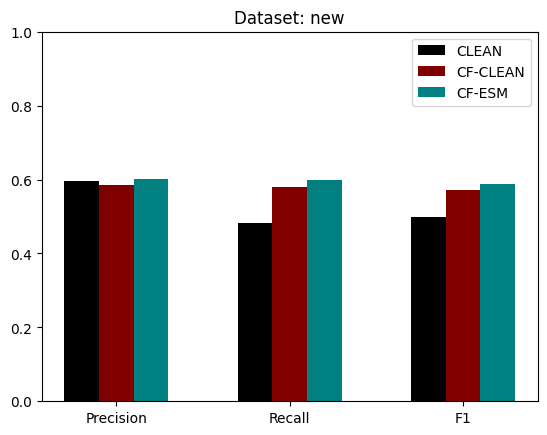

In [45]:
dataname = 'new'
measures = ['Precision', 'Recall', 'F1']
models = ['CLEAN', 'CF-CLEAN', 'CF-ESM']
measure_ks = ['precision', 'recall', 'f1']
model_ks = ['reported', 'clean', 'esm']
colors = ['black', 'maroon', 'teal']

# Width of each bar
bar_width = 0.2

# Set position of bar on X axis
r0 = np.arange(len(measures))

for i, elt in enumerate(model_ks):
    data = [res[dataname][elt][mk] for mk in measure_ks]
    print(elt, data)
    ri = [x + bar_width * i for x in r0]
    plt.bar(ri, data, color=colors[i], width=bar_width, label=models[i])


# Add xticks on the middle of the group bars
plt.title(f"Dataset: {dataname}")
plt.xticks(r0 + bar_width, measures)
plt.ylim(0, 1)

# Add legend
plt.legend()

# Show plot
plt.show()


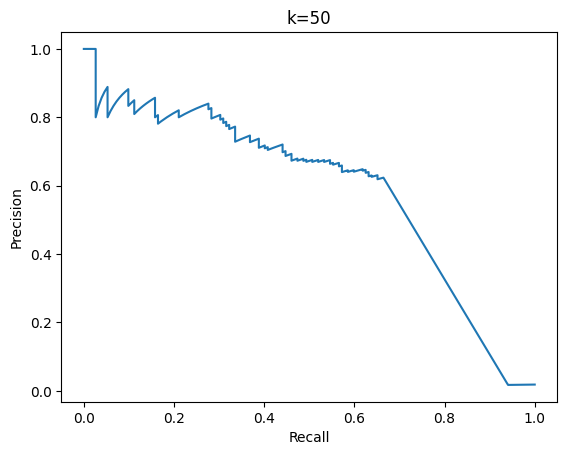

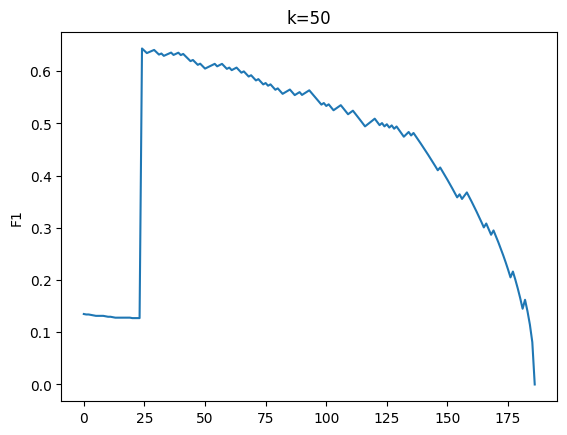

In [8]:
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_title(f"k={k}")
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")
plt.show()

fig, ax = plt.subplots()
ax.plot(np.arange(len(thresholds_pr)+1), np.sqrt(recall*precision))
ax.set_title(f"k={k}")
ax.set_ylabel("F1")
ax.set_xlabel("")
plt.show()

# fig, ax = plt.subplots()
# ax.plot(fpr, tpr)
# ax.set_title(f"k={k}")
# ax.set_ylabel("True positive rate")
# ax.set_xlabel("False positive rate")
# plt.show()

In [11]:
scratch_path = "/scratch/spn1560/"
path_pref = scratch_path + "esm_swissprot_price"
path = path_pref + f"_batch_{0}.npy"
sim_mat_i = np.load(path)
print(sim_mat_i.shape)


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/spn1560/esm_swissprot_price_batch_0.npy'

In [25]:
from src.utils import load_embed
import os

data_path = "../data/price/clean/"
i = 0
for i, elt in enumerate(os.listdir(data_path)):
    embed = load_embed(data_path + elt, embed_key=33)
    vec = embed[1].numpy()
    print(np.sqrt(np.sum(np.square(vec))))

    if i > 10:
        break

10.590832
10.640622
11.343944
10.805798
10.425579
11.513602
10.600709
10.634103
12.178757
12.443545
12.606191
8.831824


In [23]:
vec = embed[1].numpy()
print(np.sqrt(np.sum(np.square(vec))))

10.787686


In [22]:
vec

array([-0.35914874, -0.5546771 , -0.02330944,  1.2102946 ,  1.1753933 ,
       -1.3948493 , -0.4389037 , -0.06948406,  0.6986161 ,  0.7969825 ,
       -0.30878887, -0.6550534 ,  0.69950587, -0.05275437, -1.7028058 ,
       -1.7440946 ,  0.65929055,  0.6128355 , -0.3147223 ,  0.20284715,
       -0.3105805 , -1.2447166 ,  0.55994755, -0.9092405 ,  0.54558045,
       -0.5650207 , -0.6138876 , -1.5364811 ,  1.8090861 ,  1.625701  ,
        0.10622604, -0.21015751, -0.5487437 ,  1.8371991 ,  0.5535528 ,
        1.4697859 , -0.1758765 , -0.19126022,  0.791849  ,  0.2977155 ,
        3.2265441 ,  0.29740316, -0.0569251 ,  0.19134112, -1.6551871 ,
       -0.03073689,  1.7440182 , -0.14862591, -2.0015135 , -1.5520581 ,
       -0.34872842, -0.5257952 ,  0.23475365,  0.65958023,  0.36803275,
       -2.1789584 , -0.27141753, -0.47230163, -0.07688963,  0.07856035,
        1.2758445 , -0.8837034 ,  1.0963018 ,  0.8245394 ,  0.9546692 ,
        0.27473712, -1.0440588 , -1.197263  ,  0.71054035, -1.02

# hygiene

In [1]:
import pandas as pd

In [9]:
test_datasets_names = ['price', 'new', 'halogenase']
train_dataset_name = 'swissprot'
data_pref = "../data/"
overlaps = {}

train_dataset = pd.read_csv(data_pref + f"{train_dataset_name}/{train_dataset_name}.csv", sep='\t')
n_total = len(train_dataset.loc[:, "Sequence"])
train_sequences = set(train_dataset.loc[:, "Sequence"])
print(f"{len(train_sequences)} unique sequences from {n_total} total sequences")
for i, name in enumerate(test_datasets_names):
    test_dataset = pd.read_csv(data_pref + f"{name}/{name}.csv", sep='\t')
    test_sequences = set(test_dataset.loc[:, "Sequence"])
    overlaps[name] = len(train_sequences & test_sequences)

print("# sequence overlaps w/ swissprot: ", overlaps)


191460 unique sequences from 227362 total sequences
# sequence overlaps w/ swissprot:  {'price': 0, 'new': 4, 'halogenase': 0}
